In [59]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# Define the dimensions of the image
height, width = 100, 100

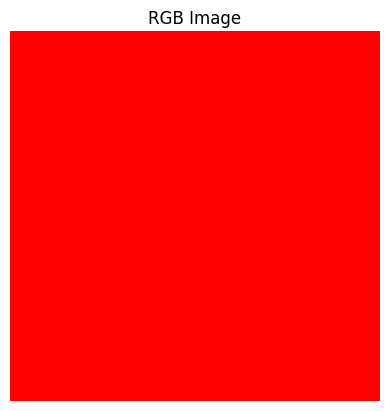

In [2]:
# Create RGB matrices (replace these with your own matrices)
R = np.full((height, width), 255, dtype=np.uint8)  # Red channel
G = np.zeros((height, width), dtype=np.uint8)      # Green channel
B = np.zeros((height, width), dtype=np.uint8)      # Blue channel

# Stack the R, G, B channels along the third dimension to form an RGB image
rgb_image = np.stack((R, G, B), axis=-1)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')  # Hide the axis
plt.show()

In [3]:
R = np.linspace(0, 255, width, dtype=np.uint8).reshape(1, -1).repeat(height, axis=0)
G = np.zeros((height, width), dtype=np.uint8)
B = np.zeros((height, width), dtype=np.uint8)

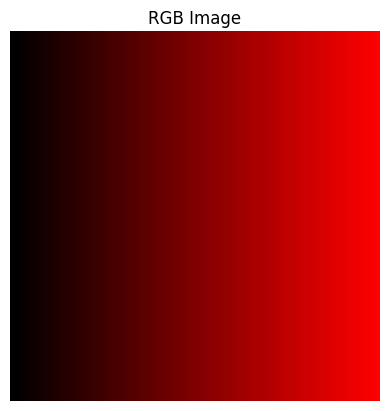

In [4]:
# Stack the R, G, B channels along the third dimension to form an RGB image
rgb_image = np.stack((R, G, B), axis=-1)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')  # Hide the axis
plt.show()

In [14]:
np.linspace(0,10, 10, dtype=np.uint8).reshape(1,-1).repeat(2, axis=0)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10]], dtype=uint8)

## excess green index

In [29]:
r = np.arange(0,255)
g = np.arange(0,255)
b = np.arange(0,255)

g2 = g * 2
r_and_b = r

In [48]:
# generate meshes 
r_mesh, b_mesh = np.meshgrid(r, b)

# flatten combos
combinations = np.vstack([mesh1.ravel(), mesh2.ravel()]).T


In [52]:
combinations[0:1000]

array([[  0,   0],
       [  1,   0],
       [  2,   0],
       ...,
       [232,   3],
       [233,   3],
       [234,   3]])

## generate color references

In [130]:
# source https://www.rapidtables.com/web/color/RGB_Color.html


with open('..\\data\\inputs\\color_references.txt') as f:
    color_rows = f.read()
    

In [131]:
x = [r.split('\t') for r in color_rows.split('\n')]
     
df = pd.DataFrame(x[1:], columns=x[0])
df['color_name'] = df['color_name'].apply(lambda x: x.strip())
df['hex_code'] = df['hex_code'].apply(lambda x: x.strip())
df['color'] = df['hex_code']
                                


In [132]:
def calc_excess_green(x):
    x = x.replace('(','')
    x = x.replace(')','')
    r,g,b = x.split(',')
    r = int(r)
    g = int(g)
    b = int(b)
    exg = g * 2 - r - b
    return pd.Series([r,g,b,exg])

#df['decimal_code'].apply(calc_excess_green)
    
df[['r','g','b','excess_green']] = df['decimal_code'].apply(calc_excess_green)

In [133]:
df

,color,color_name,hex_code,decimal_code,r,g,b,excess_green
0,#800000,maroon,#800000,"(128,0,0)",128,0,0,-128
1,#8B0000,dark red,#8B0000,"(139,0,0)",139,0,0,-139
2,#A52A2A,brown,#A52A2A,"(165,42,42)",165,42,42,-123
3,#B22222,firebrick,#B22222,"(178,34,34)",178,34,34,-144
4,#DC143C,crimson,#DC143C,"(220,20,60)",220,20,60,-240
...,...,...,...,...,...,...,...,...
134,#C0C0C0,silver,#C0C0C0,"(192,192,192)",192,192,192,0
135,#D3D3D3,light gray / light grey,#D3D3D3,"(211,211,211)",211,211,211,0
136,#DCDCDC,gainsboro,#DCDCDC,"(220,220,220)",220,220,220,0
137,#F5F5F5,white smoke,#F5F5F5,"(245,245,245)",245,245,245,0


In [136]:
df = df.sort_values(by='excess_green', ascending=False).reset_index(drop=True)




In [142]:
# Step 2: Define a function to apply the style to the 'Age' column
def color_age(val):

    return f'background-color: {val}; color: black'  # Example background color in hex


# Step 3: Apply the style function using applymap on the specific column
styled_df = df[df['color_name'].str.contains('green') == False].style.map(color_age, subset=['color'])

In [143]:
styled_df

,color,color_name,hex_code,decimal_code,r,g,b,excess_green
0,#00FF00,lime,#00FF00,"(0,255,0)",0,255,0,510
2,#7FFF00,chartreuse,#7FFF00,"(127,255,0)",127,255,0,383
8,#FFFF00,yellow,#FFFF00,"(255,255,0)",255,255,0,255
9,#00FFFF,cyan,#00FFFF,"(0,255,255)",0,255,255,255
10,#00FFFF,aqua,#00FFFF,"(0,255,255)",0,255,255,255
13,#00CED1,dark turquoise,#00CED1,"(0,206,209)",0,206,209,203
18,#40E0D0,turquoise,#40E0D0,"(64,224,208)",64,224,208,176
19,#FFD700,gold,#FFD700,"(255,215,0)",255,215,0,175
20,#7FFFD4,aqua marine,#7FFFD4,"(127,255,212)",127,255,212,171
23,#48D1CC,medium turquoise,#48D1CC,"(72,209,204)",72,209,204,142


In [144]:
styled_df = df[df['color_name'].str.contains('blue') == True].style.map(color_age, subset=['color'])

In [145]:
styled_df

,color,color_name,hex_code,decimal_code,r,g,b,excess_green
29,#00BFFF,deep sky blue,#00BFFF,"(0,191,255)",0,191,255,127
38,#5F9EA0,cadet blue,#5F9EA0,"(95,158,160)",95,158,160,61
40,#87CEEB,sky blue,#87CEEB,"(135,206,235)",135,206,235,42
41,#B0E0E6,powder blue,#B0E0E6,"(176,224,230)",176,224,230,42
48,#ADD8E6,light blue,#ADD8E6,"(173,216,230)",173,216,230,29
49,#87CEFA,light sky blue,#87CEFA,"(135,206,250)",135,206,250,27
61,#4682B4,steel blue,#4682B4,"(70,130,180)",70,130,180,10
68,#1E90FF,dodger blue,#1E90FF,"(30,144,255)",30,144,255,3
69,#F0F8FF,alice blue,#F0F8FF,"(240,248,255)",240,248,255,1
86,#B0C4DE,light steel blue,#B0C4DE,"(176,196,222)",176,196,222,-6
